# <u>Customer Segmentation for Credit Card Users: Analyzing Behavioral Patterns to Inform Targeted Marketing Strategies</u>

## Project Overview

This project aims to develop a customer segmentation model for a dataset of approximately 9,000 active credit card holders, based on their behavioral patterns over the last six months. By analyzing 18 key variables, including spending habits, payment behavior, and credit usage, it is sought to identify distinct customer segments. The insights gained from this segmentation could be used to inform and optimize targeted marketing strategies, allowing for more personalized and effective outreach. At the end of the day, this approach could help in better understanding customer needs, enhancing customer satisfaction, and driving business growth.

Dataset: https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

## Project Owner: Manuel Contreras

### 1 - Libraries

##### Data Manipulation and Analysis

In [111]:
import numpy as np
import pandas as pd

##### Data Visualization

In [112]:
import matplotlib.pyplot as plt 
import matplotlib.cm as cm 
import seaborn as sns 
import plotly.graph_objects as go 
import plotly.express as px 

##### Statistical Analysis

In [113]:
import scipy.stats as stats 
from scipy.cluster.hierarchy import dendrogram, linkage 
from scipy.cluster.hierarchy import fcluster 
from scipy.cluster.hierarchy import cophenet 
from scipy.spatial.distance import pdist 

##### Machine Learning and Clustering:

In [114]:
from sklearn.decomposition import PCA 
from sklearn.metrics import silhouette_score 
from sklearn.cluster import KMeans 
from sklearn.cluster import AgglomerativeClustering 
from sklearn import preprocessing 
from sklearn import decomposition 

##### Display and HTML

In [115]:
from IPython.display import display, HTML

### 2 - Dataset Import and Feature Computation

In [59]:
# Function to create scrollable table within a small window
def create_scrollable_table(df, table_id, title):
    html = f'<h3>{title}</h3>'
    html += f'<div id="{table_id}" style="height:200px; overflow:auto;">'
    html += df.to_html()
    html += '</div>'
    return html

In [60]:
# file path
file_path = r"C:\Users\manue\Desktop\DataScience\Datasets\CC GENERAL.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [61]:
rows, columns = df.shape
print(f"The dataset has {columns} columns and {rows} rows.")

The dataset has 18 columns and 8950 rows.


In [62]:
column_names = df.columns.values
column_names

array(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'], dtype=object)

In [63]:
numerical_features = df.select_dtypes(include=[np.number])
numerical_features.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [64]:
# Summary statistics for numerical features
numerical_features = df.select_dtypes(include=[np.number])
summary_stats = numerical_features.describe().T
html_numerical = create_scrollable_table(summary_stats, 'numerical_features', 'Summary statistics for numerical features')

display(HTML(html_numerical))

### 3 - Data Cleaning

#### Null Values Processing

In [65]:
# Null values in the dataset
null_values = df.isnull().sum()
html_null_values = create_scrollable_table(null_values.to_frame(), 'null_values', 'Null values in the dataset')

# Percentage of missing values for each feature
missing_percentage = (df.isnull().sum() / len(df)) * 100
html_missing_percentage = create_scrollable_table(missing_percentage.to_frame(), 'missing_percentage', 'Percentage of missing values for each feature')

display(HTML(html_null_values + html_missing_percentage))

Only 3,5% of the rows have values that are null, for that reason, it is decided to just eliminate them.

In [66]:
df.dropna(inplace=True)

rows, columns = df.shape
print(f"The dataset after dropping the null values has {columns} columns and {rows} rows.")

The dataset after dropping the null values has 18 columns and 8636 rows.


#### Elimination of Duplicates

In [67]:
df.duplicated().sum()

0

#### Feature Engineering and Data Type Correction

In [68]:
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [69]:
# The datatypes make sense, however CUST_ID should be dropped, as it does not any value to the analysis
df.drop('CUST_ID', axis=1, inplace=True)

### 4 - Exploratory Data Analysis

#### Distribution of Balance Amounts

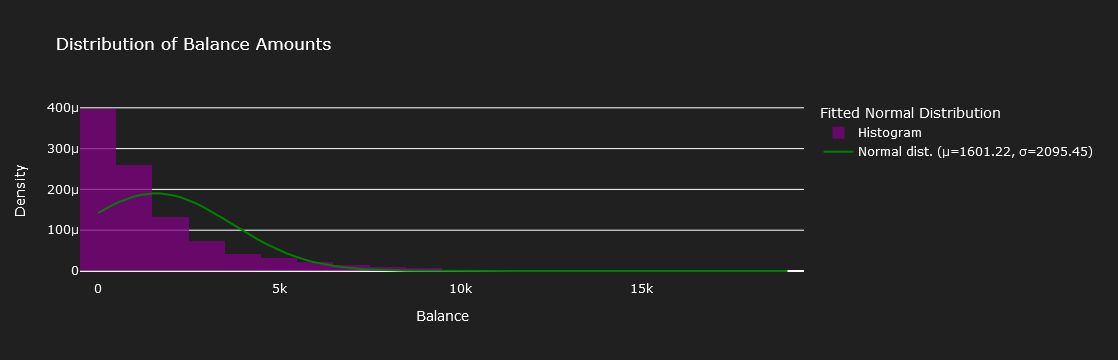

In [70]:
# Fit a normal distribution to the 'BALANCE' data
mu, sigma = stats.norm.fit(df['BALANCE'])

# Create a histogram of the 'BALANCE' column
hist_data = go.Histogram(
    x=df['BALANCE'], 
    nbinsx=30, 
    name="Histogram", 
    opacity=0.75, 
    histnorm='probability density', 
    marker=dict(color='purple')
)

# Calculate the normal distribution based on the fitted parameters
x_norm = np.linspace(df['BALANCE'].min(), df['BALANCE'].max(), 100)
y_norm = stats.norm.pdf(x_norm, mu, sigma)

# Create the normal distribution overlay
norm_data = go.Scatter(
    x=x_norm, 
    y=y_norm, 
    mode="lines", 
    name=f"Normal dist. (μ={mu:.2f}, σ={sigma:.2f})", 
    line=dict(color="green")
)

# Combine the histogram and the overlay
fig = go.Figure(data=[hist_data, norm_data])

# Set the layout for the plot
fig.update_layout(
    title="Distribution of Balance Amounts",
    xaxis_title="Balance",
    yaxis_title="Density",
    legend_title_text="Fitted Normal Distribution",
    plot_bgcolor='rgba(32, 32, 32, 1)',
    paper_bgcolor='rgba(32, 32, 32, 1)',
    font=dict(color='white')
)

In [71]:
balance_under_2500 = df[df['BALANCE'] < 2500]
count_under_2500 = balance_under_2500.shape[0]
total_rows = df.shape[0]
percentage_under_2500 = (count_under_2500 / total_rows) * 100
print(f"Percentage of customers with a balance less than 2500: {percentage_under_2500:.2f}%")

Percentage of customers with a balance less than 2500: 78.89%


#### Correlation Matrix

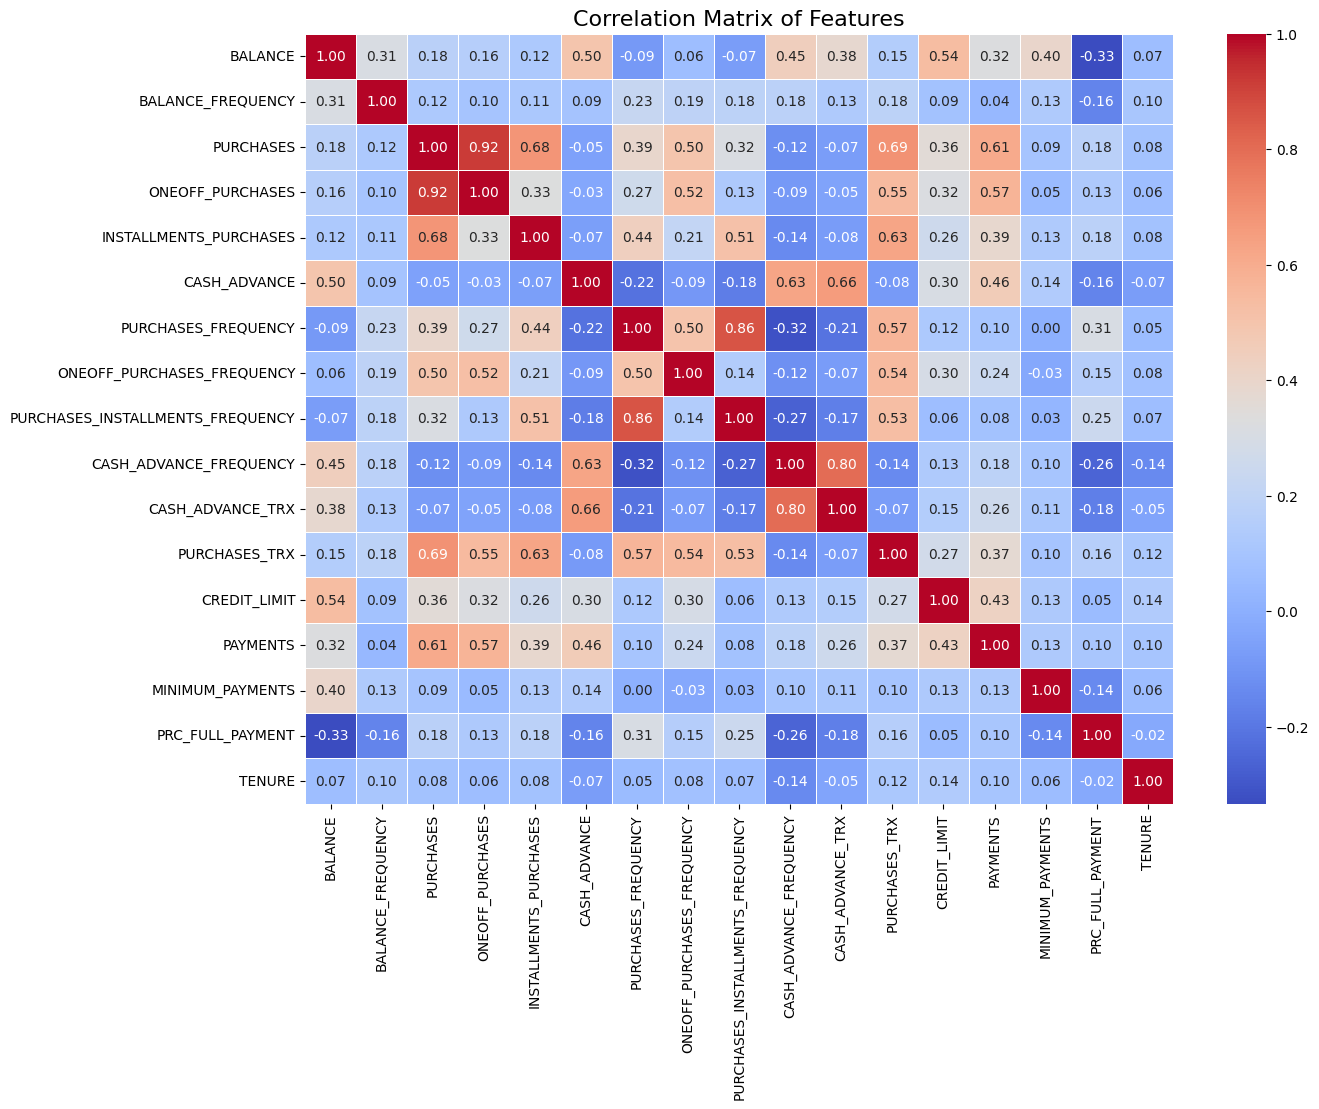

In [72]:
# correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(14, 10))  

# heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Matrix of Features', fontsize=16)
plt.show()

The graph above evidences really high correlations between the Purchases and oneoff_purchases, purchases_installments_frequency and purchases_frequency and cash_advance_frequency and cash_advance_trx.

Such high correlations can have really negative consequences in the clustering model. 

* Redundancy in Information: When two variables are highly correlated, they provide similar information. Including both in the clustering model doesn't add new information but rather reinforces the same data trend. This redundancy can distort the clustering results because the model might overemphasize the pattern represented by these correlated variables, leading to biased clusters.

* Dimensionality Issues: High-dimensional data with redundant features can make it harder for clustering algorithms to find meaningful separations between clusters. Algorithms like k-means, for example, can struggle to converge on an optimal clustering solution when irrelevant or redundant dimensions are present. This can lead to suboptimal cluster assignments, where clusters may overlap or certain patterns may be missed entirely due to the noise introduced by redundant features.

* Clustering Algorithm Sensitivity: Some clustering algorithms, like k-means, are sensitive to the scale of the data and the presence of correlated features. Highly correlated features can dominate the distance metrics used by these algorithms, skewing the clustering results. This can cause the algorithm to favor certain features disproportionately, leading to poorly separated or even incorrect clusters.

* Curse of Dimensionality: With high-dimensional data, especially when correlated features are present, the distance between data points becomes less meaningful, and the data becomes sparse. This can make it difficult for clustering algorithms to identify meaningful clusters, as all points can start to seem equidistant in a high-dimensional space, leading to less reliable clusters.

Let see these relationships further in other graphs

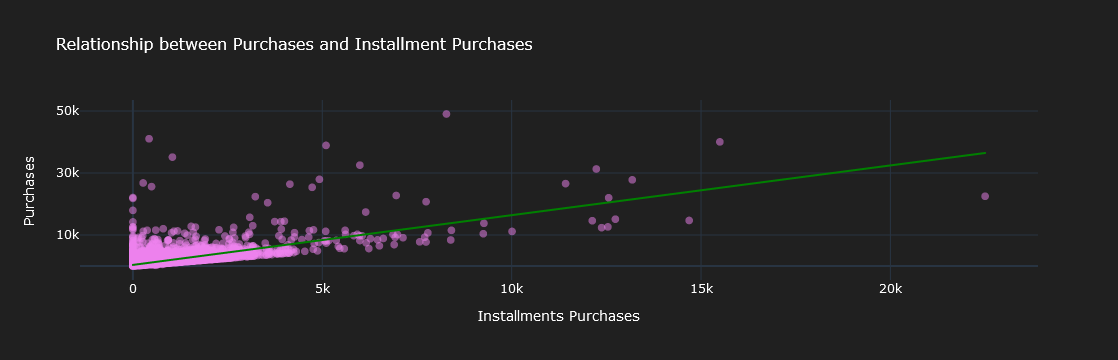

In [73]:
# scatter plot with a regression line
fig = px.scatter(
    df, 
    x='INSTALLMENTS_PURCHASES', 
    y='PURCHASES', 
    trendline='ols',  # Ordinary Least Squares regression line
    opacity=0.5,
    title='Relationship between Purchases and Installment Purchases',
    template='plotly_dark'
)

# colors
fig.update_traces(
    marker=dict(color='violet', size=8),  # Scatter points in violet
    line=dict(color='green')  # Regression line in green
)

# layout for the plot
fig.update_layout(
    xaxis_title='Installments Purchases',
    yaxis_title='Purchases',
    yaxis_tickvals=[10000, 30000, 50000],  # Specific y-axis tick values
    title_font=dict(size=16),
    height=600,  # Set height to 6 inches (600 pixels)
    plot_bgcolor='rgba(32, 32, 32, 1)',
    paper_bgcolor='rgba(32, 32, 32, 1)',
    font=dict(color='white')
)

# Show the plot
fig.show()


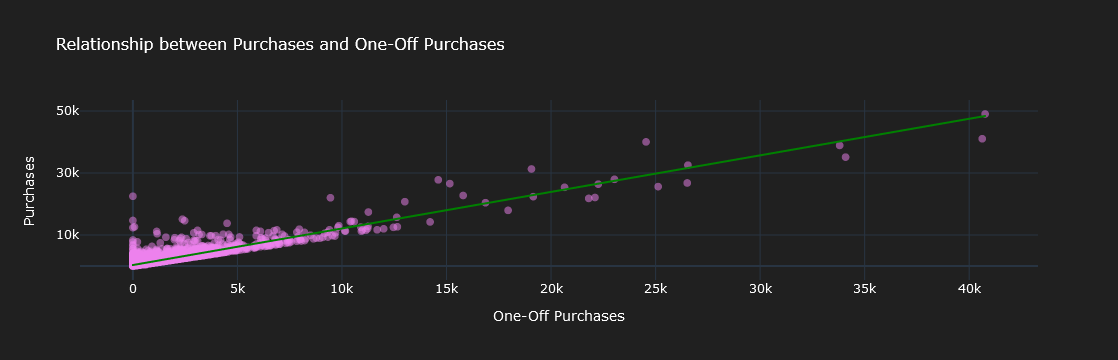

In [74]:
fig = px.scatter(
    df, 
    x='ONEOFF_PURCHASES', 
    y='PURCHASES', 
    trendline='ols',  # Ordinary Least Squares regression line
    opacity=0.5,
    title='Relationship between Purchases and One-Off Purchases',
    template='plotly_dark'
)

# colors
fig.update_traces(
    marker=dict(color='violet', size=8),  # Scatter points in violet
    line=dict(color='green')  # Regression line in green
)

# layout for the plot
fig.update_layout(
    xaxis_title='One-Off Purchases',
    yaxis_title='Purchases',
    yaxis_tickvals=[10000, 30000, 50000],  # Specific y-axis tick values
    title_font=dict(size=16),
    height=600,  # Set height to 6 inches (600 pixels)
    plot_bgcolor='rgba(32, 32, 32, 1)',
    paper_bgcolor='rgba(32, 32, 32, 1)',
    font=dict(color='white')
)


fig.show()


There are two ways to tackle this problem, and both will be conducted: 

* Feature Selection: By removing one of the correlated variables to reduce redundancy. Techniques like variance inflation factor (VIF) or correlation thresholds identify and eliminate highly correlated variables.

* Dimensionality Reduction: PCA (Principal Component Analysis) combine correlated features into a single principal component. This reduces redundancy while preserving the essential information.

#### Distribution of Balance and Credit Limit

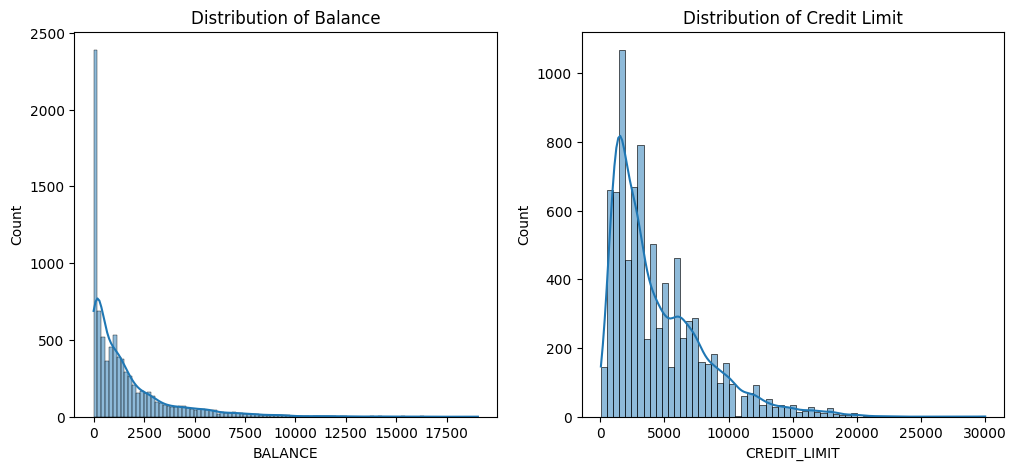

In [75]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['BALANCE'], kde=True)
plt.title('Distribution of Balance')

plt.subplot(1, 2, 2)
sns.histplot(df['CREDIT_LIMIT'], kde=True)
plt.title('Distribution of Credit Limit')
plt.show()

#### Pair Plot or Purchase Behavior

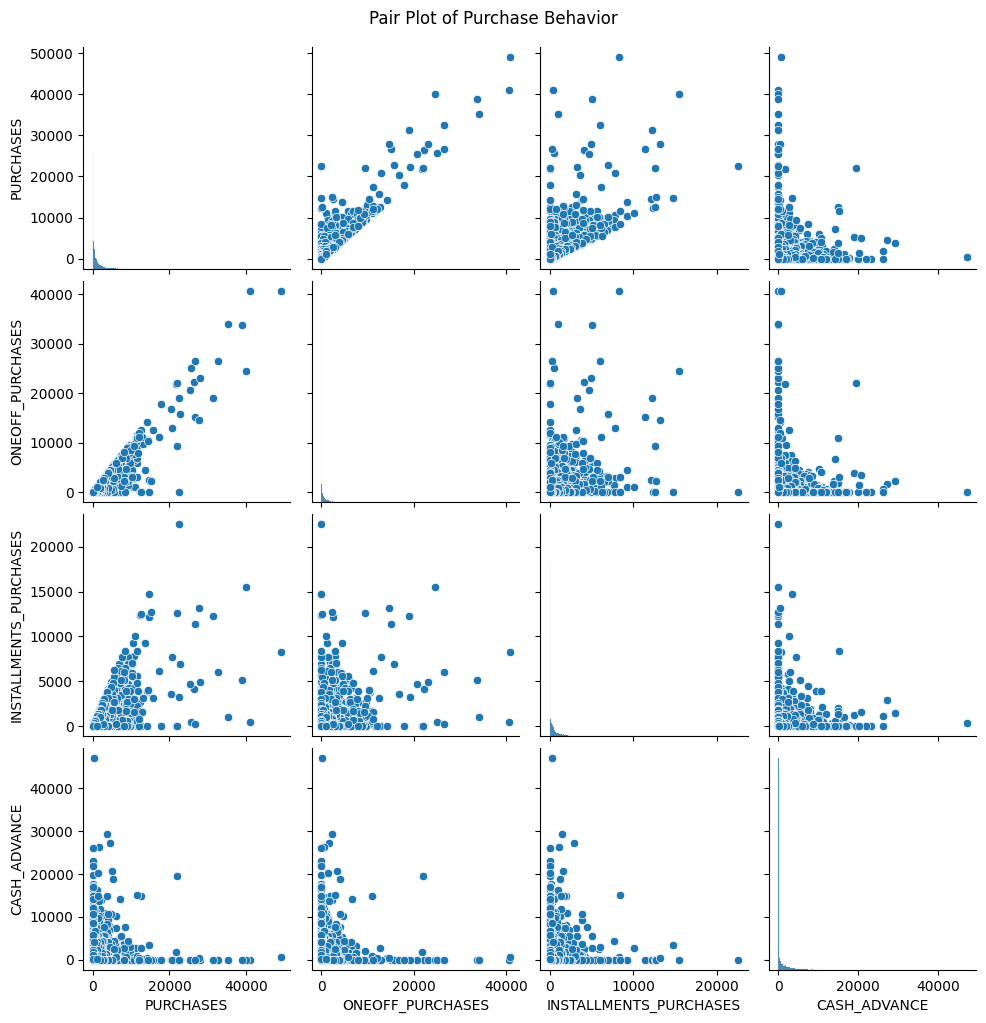

In [76]:
sns.pairplot(df[['PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE']])
plt.suptitle('Pair Plot of Purchase Behavior', y=1.02)
plt.show()

#### Analysis of Payment Behavior Across Different Credit Limit Ranges

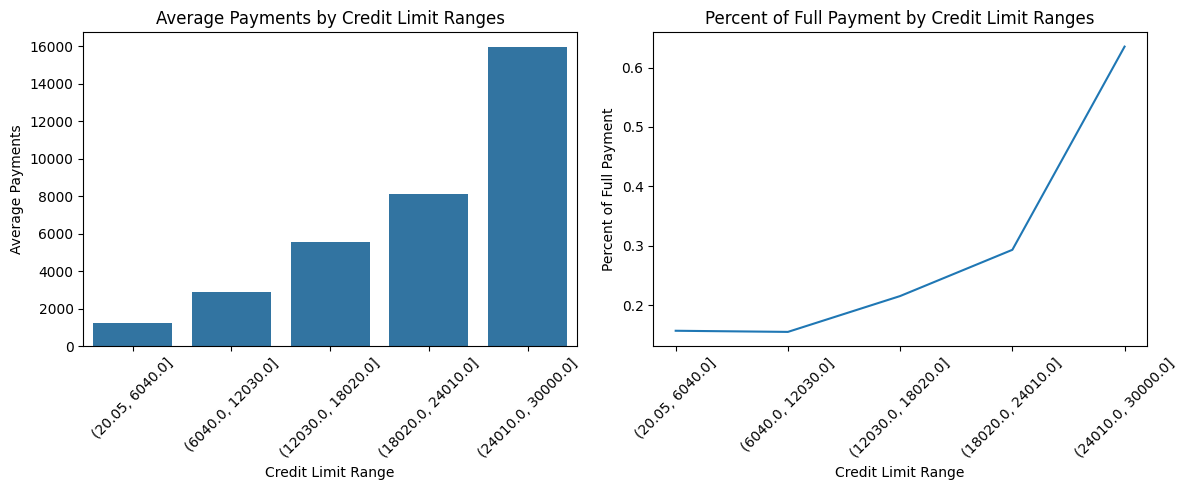

In [77]:
# Bins and bin labels
bins = pd.cut(df['CREDIT_LIMIT'], bins=5)
bin_labels = bins.cat.categories.astype(str)  # Convert categories to string

# Mean payments for each bin
mean_payments = df.groupby(bins, observed=False)['PAYMENTS'].mean()

# DataFrame for the bar plot
barplot_df = pd.DataFrame({
    'Credit Limit Range': bin_labels,
    'Average Payments': mean_payments
})

# Mean percent of full payments for each bin
mean_full_payment = df.groupby(bins, observed=False)['PRC_FULL_PAYMENT'].mean()

# DataFrame for the line plot
lineplot_df = pd.DataFrame({
    'Credit Limit Range': bin_labels,
    'Percent of Full Payment': mean_full_payment
})

plt.figure(figsize=(12, 5))

# Bar plot
plt.subplot(1, 2, 1)
sns.barplot(x='Credit Limit Range', y='Average Payments', data=barplot_df)
plt.title('Average Payments by Credit Limit Ranges')
plt.xticks(rotation=45)

# Line plot
plt.subplot(1, 2, 2)
sns.lineplot(x='Credit Limit Range', y='Percent of Full Payment', data=lineplot_df)
plt.title('Percent of Full Payment by Credit Limit Ranges')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

This plot illustrates how the tendency to make full payments varies with different credit limit levels. For instance, it shows that customers with higher credit limits are more likely to pay off their balance in full.
By comparing the two plots, we can identify that there is a positive relationship between the average amount paid and the percent of full payment across different credit limit ranges.

# 5 - Implementation of Different Models

## 6 - K- Means (with scaled dataset, using all the variables)

K-Means is a clustering algorithm used to divide data into a specified number of clusters. It begins by selecting a predetermined number of initial centroids randomly. Each data point is then assigned to the nearest centroid, forming clusters. The centroids are recalculated as the mean of the data points in each cluster, and this process repeats until the centroids stabilize or a set number of iterations is completed.

The main goal of K-Means is to minimize the variance within each cluster, which is the sum of squared distances between data points and their cluster centroids. While it is simple and efficient, K-Means requires the human to specify the number of clusters in advance and can be sensitive to the initial placement of centroids. It also assumes clusters are spherical and of similar size, which might not always fit the data.

In [78]:
scaler = preprocessing.StandardScaler().fit(df)
xscal = scaler.transform(df)
xscal

array([[-0.74462486, -0.37004679, -0.42918384, ..., -0.30550763,
        -0.53772694,  0.35518066],
       [ 0.76415211,  0.06767893, -0.47320819, ...,  0.08768873,
         0.21238001,  0.35518066],
       [ 0.42660239,  0.50540465, -0.11641251, ..., -0.09990611,
        -0.53772694,  0.35518066],
       ...,
       [-0.75297728, -0.29709491, -0.40657175, ..., -0.32957217,
         0.30614422, -4.22180042],
       [-0.75772142, -0.29709491, -0.47320819, ..., -0.34081076,
         0.30614422, -4.22180042],
       [-0.58627829, -1.09958965,  0.03129519, ..., -0.32709767,
        -0.53772694, -4.22180042]])

Elbow Method: is a technique used to determine the optimal number of clusters KK for a clustering algorithm like K-Means. It involves plotting the sum of squared distances (or variance) from each data point to its assigned cluster centroid as a function of KK.
As KK increases, the variance typically decreases because clusters become smaller and more compact. The "elbow" in the plot represents a point where the rate of decrease sharply slows down. This point is seen as the best number of clusters because adding more clusters after this won’t significantly reduce the variance any further; the improvements become smaller and less meaningful.

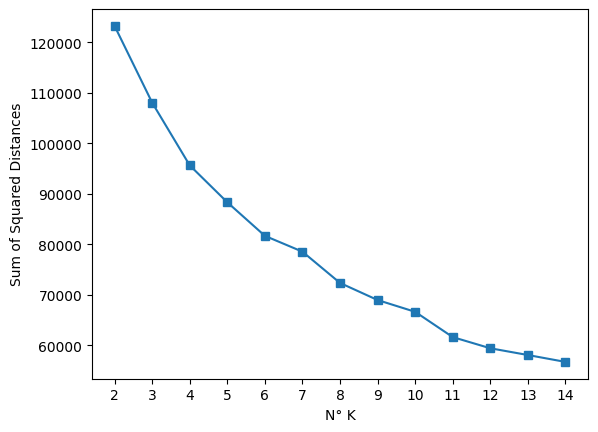

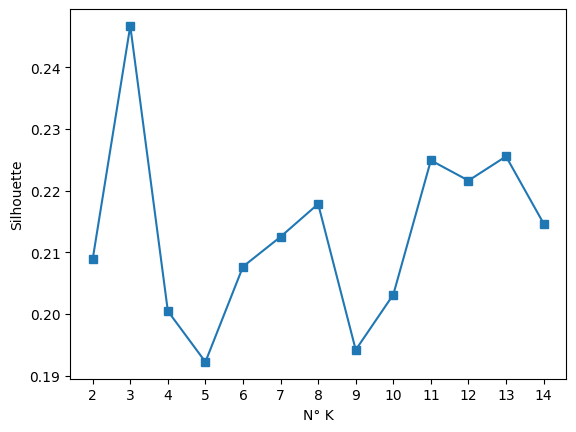

In [79]:
dist_cent = []
sill_list = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(xscal)
    sill_score = silhouette_score(xscal, kmeans.labels_)
    sill_list.append(sill_score)
    dist_cent.append(kmeans.inertia_)

# Plot Sum of Squared Distances
plt.plot(range(2, 15), dist_cent, marker='s')
plt.xlabel('N° K')
plt.ylabel('Sum of Squared Distances')
plt.xticks(range(2, 15))  # Set x-axis to show every integer from 2 to 14
plt.show()

# Plot Silhouette Scores
plt.plot(range(2, 15), sill_list, marker='s')
plt.xlabel('N° K')
plt.ylabel('Silhouette')
plt.xticks(range(2, 15))  # Set x-axis to show every integer from 2 to 14
plt.show()

In [80]:
kmeans1 = KMeans(n_clusters=3, random_state=10).fit(xscal)

In [81]:
kmeans1.labels_ = kmeans1.labels_+1
kmeans1.labels_

array([1, 2, 1, ..., 1, 2, 1])

In [82]:
centers1 = kmeans1.cluster_centers_
centers1

array([[-0.44828737, -0.23099092, -0.11443707, -0.12862397, -0.03408165,
        -0.40052955,  0.33833493, -0.01576563,  0.27084288, -0.52472158,
        -0.39983201, -0.06811618, -0.24554789, -0.26243236, -0.15792669,
         0.20207627,  0.02798364],
       [ 0.54815027,  0.25614687, -0.37103893, -0.26582558, -0.38879317,
         0.65473857, -0.87387155, -0.43695684, -0.73128321,  0.9103249 ,
         0.67154784, -0.47696776,  0.07971725,  0.06764989,  0.15439809,
        -0.43867378, -0.12561633],
       [ 0.66370147,  0.43575232,  1.99106104,  1.69881719,  1.58509968,
         0.00481358,  1.13961025,  1.64984496,  1.0254115 , -0.18111549,
        -0.0591859 ,  2.0982009 ,  1.14974374,  1.29136577,  0.37181528,
         0.38382171,  0.28441207]])

In [83]:
sill_score1 = silhouette_score(xscal,kmeans1.labels_)
print(sill_score1)

0.17991158475248575


In [84]:
# Store of results
results_df = pd.DataFrame(columns=['Cluster', 'Sill'])
new_row = pd.DataFrame([{'Cluster': 'K- Means (with scaled dataset, using all the variables)', 'Sill': sill_score1}])
results_df = pd.concat([results_df, new_row], ignore_index=True)
results_df.head()

C:\Users\manue\AppData\Local\Temp\ipykernel_7448\2028622638.py:4: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Cluster      Sill
0  K- Means (with scaled dataset, using all the v...  0.179912

## 6 - K- Means (with scaled dataset, eliminating first variables that are highly correlated)

In [85]:
columns_to_remove = ['ONEOFF_PURCHASES', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY']
df_cleaned = df.drop(columns=columns_to_remove)

In [86]:
scaler = preprocessing.StandardScaler().fit(df_cleaned)
xscal1 = scaler.transform(df_cleaned)
xscal1

array([[-0.74462486, -0.37004679, -0.42918384, ..., -0.30550763,
        -0.53772694,  0.35518066],
       [ 0.76415211,  0.06767893, -0.47320819, ...,  0.08768873,
         0.21238001,  0.35518066],
       [ 0.42660239,  0.50540465, -0.11641251, ..., -0.09990611,
        -0.53772694,  0.35518066],
       ...,
       [-0.75297728, -0.29709491, -0.40657175, ..., -0.32957217,
         0.30614422, -4.22180042],
       [-0.75772142, -0.29709491, -0.47320819, ..., -0.34081076,
         0.30614422, -4.22180042],
       [-0.58627829, -1.09958965,  0.03129519, ..., -0.32709767,
        -0.53772694, -4.22180042]])

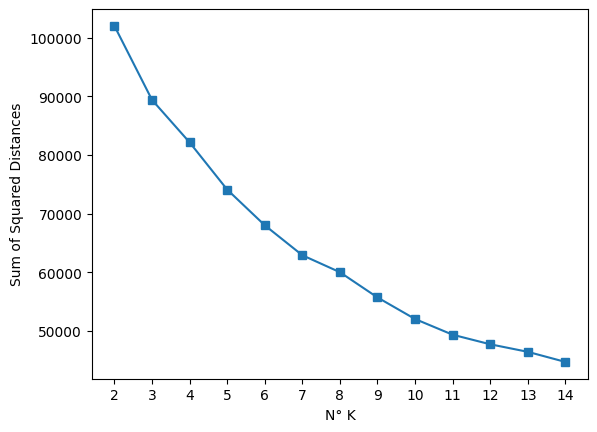

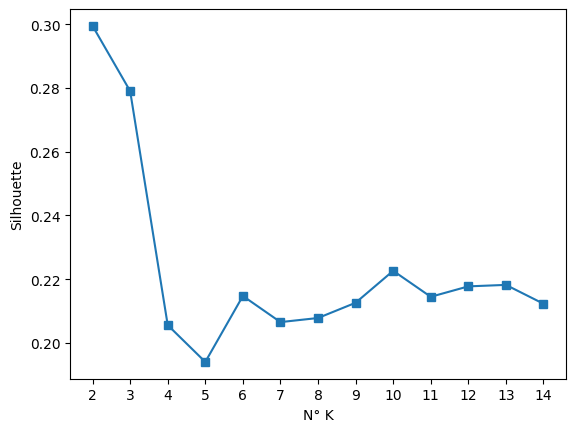

In [87]:
dist_cent = []
sill_list = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(xscal1)
    sill_score = silhouette_score(xscal1, kmeans.labels_)
    sill_list.append(sill_score)
    dist_cent.append(kmeans.inertia_)

# Plot Sum of Squared Distances
plt.plot(range(2, 15), dist_cent, marker='s')
plt.xlabel('N° K')
plt.ylabel('Sum of Squared Distances')
plt.xticks(range(2, 15))  # Set x-axis to show every integer from 2 to 14
plt.show()

# Plot Silhouette Scores
plt.plot(range(2, 15), sill_list, marker='s')
plt.xlabel('N° K')
plt.ylabel('Silhouette')
plt.xticks(range(2, 15))  # Set x-axis to show every integer from 2 to 14
plt.show()

In [88]:
kmeans2 = KMeans(n_clusters=3, random_state=10).fit(xscal1)

In [89]:
kmeans2.labels_ = kmeans2.labels_+1
kmeans2.labels_

array([1, 2, 3, ..., 1, 1, 1])

In [90]:
centers2 = kmeans2.cluster_centers_
centers2

array([[-0.33583879, -0.1684913 , -0.26461229, -0.20551418, -0.24907576,
        -0.18282775, -0.34524478, -0.20455925, -0.29293689, -0.3709094 ,
        -0.28610391, -0.14003108, -0.04041643, -0.07368046],
       [ 1.59941689,  0.33973137, -0.22823536, -0.23742177,  1.71706338,
        -0.54490933, -0.29347384,  1.46599294, -0.30344857,  0.98553385,
         0.70755388,  0.73594189, -0.43157069,  0.0128241 ],
       [ 0.14120299,  0.41179534,  1.20805206,  0.98257813, -0.28644847,
         1.12000561,  1.57299351, -0.27638106,  1.37478465,  0.73137919,
         0.60294835,  0.00799434,  0.47684245,  0.28009895]])

In [91]:
sill_score2 = silhouette_score(xscal1,kmeans2.labels_)
print(sill_score2)

0.2791346854177697


In [92]:
new_row = pd.DataFrame([{'Cluster': 'K- Means (with scaled dataset, eliminating first variables that are highly correlated)', 'Sill': sill_score2}])
results_df = pd.concat([results_df, new_row], ignore_index=True)
results_df.head()

Cluster      Sill
0  K- Means (with scaled dataset, using all the v...  0.179912
1  K- Means (with scaled dataset, eliminating fir...  0.279135

## 7 - K- Means (with scaled dataset and PCA)

Principal Component Analysis (PCA) is a statistical technique used for dimensionality reduction and feature extraction. It transforms a large set of variables into a smaller set of uncorrelated variables called principal components while retaining as much variability (information) as possible.

Key Points:

* Dimensionality Reduction: PCA reduces the number of variables (dimensions) in a dataset by projecting it onto a new set of orthogonal axes (principal components) that capture the most variance in the data.

* Principal Components: These are new variables formed as linear combinations of the original variables. The first principal component captures the highest variance, the second captures the next highest variance orthogonally to the first, and so on.

* Variance Explained: Each principal component represents a proportion of the total variance in the dataset. The first few components often capture most of the variance, making it possible to reduce the dimensionality while preserving significant information.

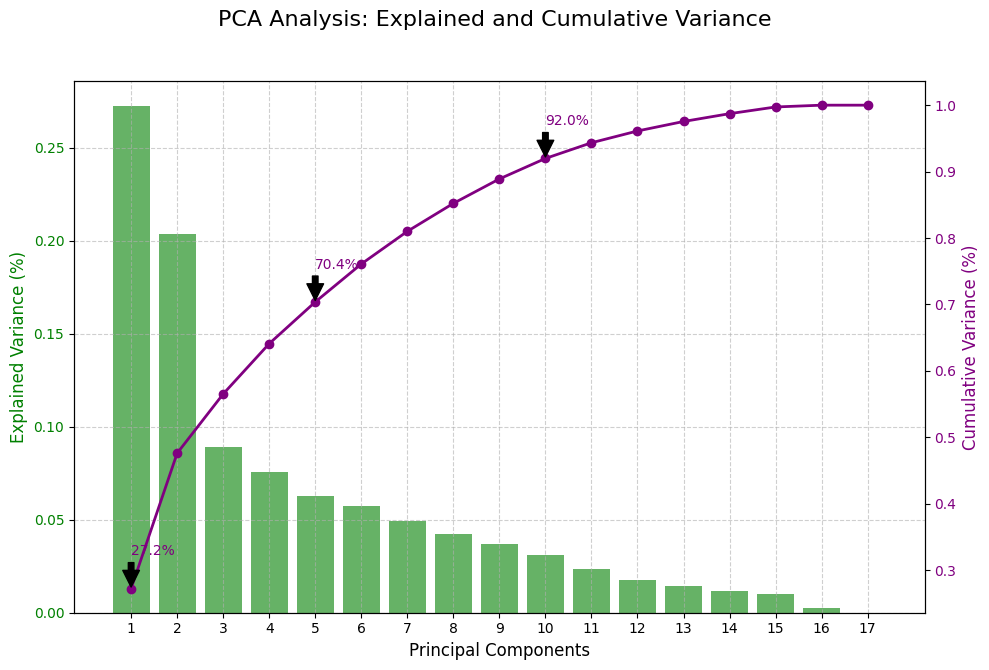

In [93]:
n_comps = 17
components = range(1, n_comps + 1)
pca = decomposition.PCA(n_components=n_comps)

# Fit the model
pca.fit(xscal)

# Transform the data
xpca = pca.transform(xscal)

# Percentage of variance explained by each PC
eigenvalues = pca.explained_variance_ratio_

# Cumulative sum of explained variance
eigenvalues_acum = pca.explained_variance_ratio_.cumsum()

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 7))

# Atitle
fig.suptitle('PCA Analysis: Explained and Cumulative Variance', fontsize=16)

# Left axis
ax1.set_xlabel('Principal Components', fontsize=12)
ax1.set_ylabel('Explained Variance (%)', color='green', fontsize=12)
ax1.bar(components, eigenvalues, color='green', alpha=0.6)
ax1.tick_params(axis='y', labelcolor='green')
ax1.set_xticks(range(1, n_comps + 1))
ax1.grid(True, linestyle='--', alpha=0.6)

# Right axis
ax2 = ax1.twinx()
ax2.set_ylabel('Cumulative Variance (%)', color='purple', fontsize=12)
ax2.plot(components, eigenvalues_acum, color='purple', marker='o', linestyle='-', linewidth=2)
ax2.tick_params(axis='y', labelcolor='purple')

# Annotate cumulative variance at key points (e.g., PC1, PC5, PC10)
for i in [0, 4, 9]:
    ax2.annotate(f'{eigenvalues_acum[i]*100:.1f}%', 
                 xy=(components[i], eigenvalues_acum[i]), 
                 xytext=(components[i], eigenvalues_acum[i] + 0.05),
                 textcoords='data',
                 arrowprops=dict(facecolor='black', shrink=0.05),
                 fontsize=10, color='purple')

# Improve layout and show plot
fig.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to include title
plt.show()

In [94]:
# I see that only 5 PC explain 70% of the variance
n_comps = 5 


pca = decomposition.PCA(n_components=n_comps)
pca.fit(xscal)

# Transform the data into the top 5 PCs
xpca_reduced = pca.transform(xscal)

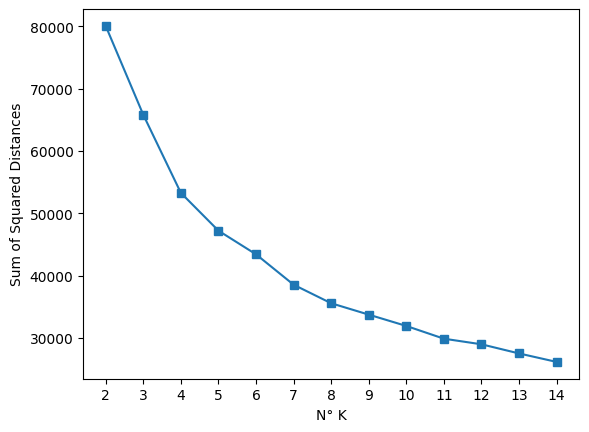

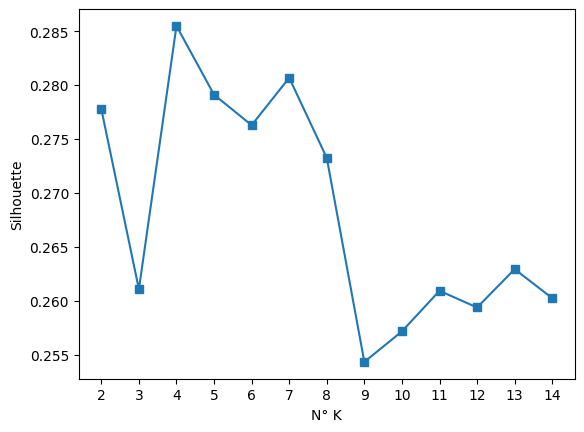

In [95]:
dist_cent = []
sill_list = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(xpca_reduced)
    sill_score = silhouette_score(xpca_reduced, kmeans.labels_)
    sill_list.append(sill_score)
    dist_cent.append(kmeans.inertia_)

# Plot Sum of Squared Distances
plt.plot(range(2, 15), dist_cent, marker='s')
plt.xlabel('N° K')
plt.ylabel('Sum of Squared Distances')
plt.xticks(range(2, 15))  
plt.show()

# Plot Silhouette Scores
plt.plot(range(2, 15), sill_list, marker='s')
plt.xlabel('N° K')
plt.ylabel('Silhouette')
plt.xticks(range(2, 15)) 
plt.show()

In [96]:
kmeans3 = KMeans(n_clusters=3, random_state=10).fit(xpca_reduced)

In [97]:
kmeans3.labels_ = kmeans3.labels_
kmeans3.labels_

array([0, 2, 1, ..., 0, 0, 0])

In [98]:
centers3 = kmeans3.cluster_centers_
centers3

array([[-1.19075148, -0.34532544, -0.48528404,  0.2949915 , -0.06921215],
       [ 1.85359847, -0.86472199,  0.54937734, -0.21300134,  0.12570687],
       [-0.533736  ,  3.47669194,  0.3160771 , -0.50536141, -0.07755218]])

In [99]:
sill_score3 = silhouette_score(xscal1,kmeans3.labels_)
print(sill_score3)

0.18177338459509473


In [100]:
new_row = pd.DataFrame([{'Cluster': 'K- Means (with scaled dataset and PCA)', 'Sill': sill_score3}])
results_df = pd.concat([results_df, new_row], ignore_index=True)
results_df.head()

Cluster      Sill
0  K- Means (with scaled dataset, using all the v...  0.179912
1  K- Means (with scaled dataset, eliminating fir...  0.279135
2             K- Means (with scaled dataset and PCA)  0.181773

I am not seeing any improvement in the silhouette score. It would be interesting to display the 2 most popular PC and the distribution of the labels to see if a pattern is to be identified

## 8 - K- Means (Only with the top 2 PCA)

In [101]:
n_comps = 2
pca = decomposition.PCA(n_components=n_comps)
pca.fit(xscal)


xpca_reduced_2 = pca.transform(xscal)

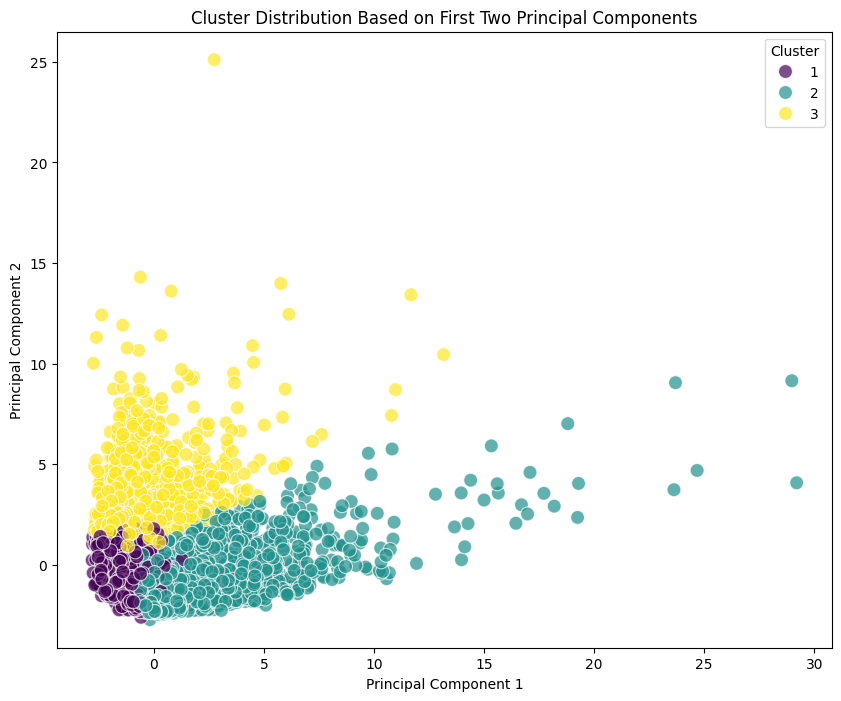

In [102]:
df_pca = pd.DataFrame(xpca_reduced_2, columns=['PC1', 'PC2'])
df_pca['Cluster'] = kmeans3.labels_ + 1  

# Plotting the scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='viridis', data=df_pca, s=100, alpha=0.7)

plt.title('Cluster Distribution Based on First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [103]:
kmeans4 = KMeans(n_clusters=3, random_state=10).fit(xpca_reduced_2)

In [104]:
kmeans4.labels_ = kmeans4.labels_
kmeans4.labels_

array([0, 1, 0, ..., 0, 0, 0])

In [105]:
centers4 = kmeans4.cluster_centers_
centers4

array([[-0.5442349 , -0.7817772 ],
       [-0.8950386 ,  2.85708624],
       [ 3.93092415, -0.04483098]])

In [106]:
sill_score4 = silhouette_score(xpca_reduced_2,kmeans4.labels_)
print(sill_score4)

0.4481618472192212


In [107]:
new_row = pd.DataFrame([{'Cluster': 'K- Means (Only with the top 2 PCA)', 'Sill': sill_score4}])
results_df = pd.concat([results_df, new_row], ignore_index=True)
results_df.head()

Cluster      Sill
0  K- Means (with scaled dataset, using all the v...  0.179912
1  K- Means (with scaled dataset, eliminating fir...  0.279135
2             K- Means (with scaled dataset and PCA)  0.181773
3                 K- Means (Only with the top 2 PCA)  0.448162

## 9 - Agglomerative Clustering (2 PCA)

Agglomerative clustering is a type of hierarchical clustering that builds nested clusters by successively merging or agglomerating individual data points or clusters. It is one of the most common types of hierarchical clustering methods and is particularly useful when the underlying structure of the data is hierarchical or when you want to explore data at different levels of granularity.

In [53]:
Z1 = linkage(xpca_reduced, 'ward')

In [54]:
dist_cluster = 148

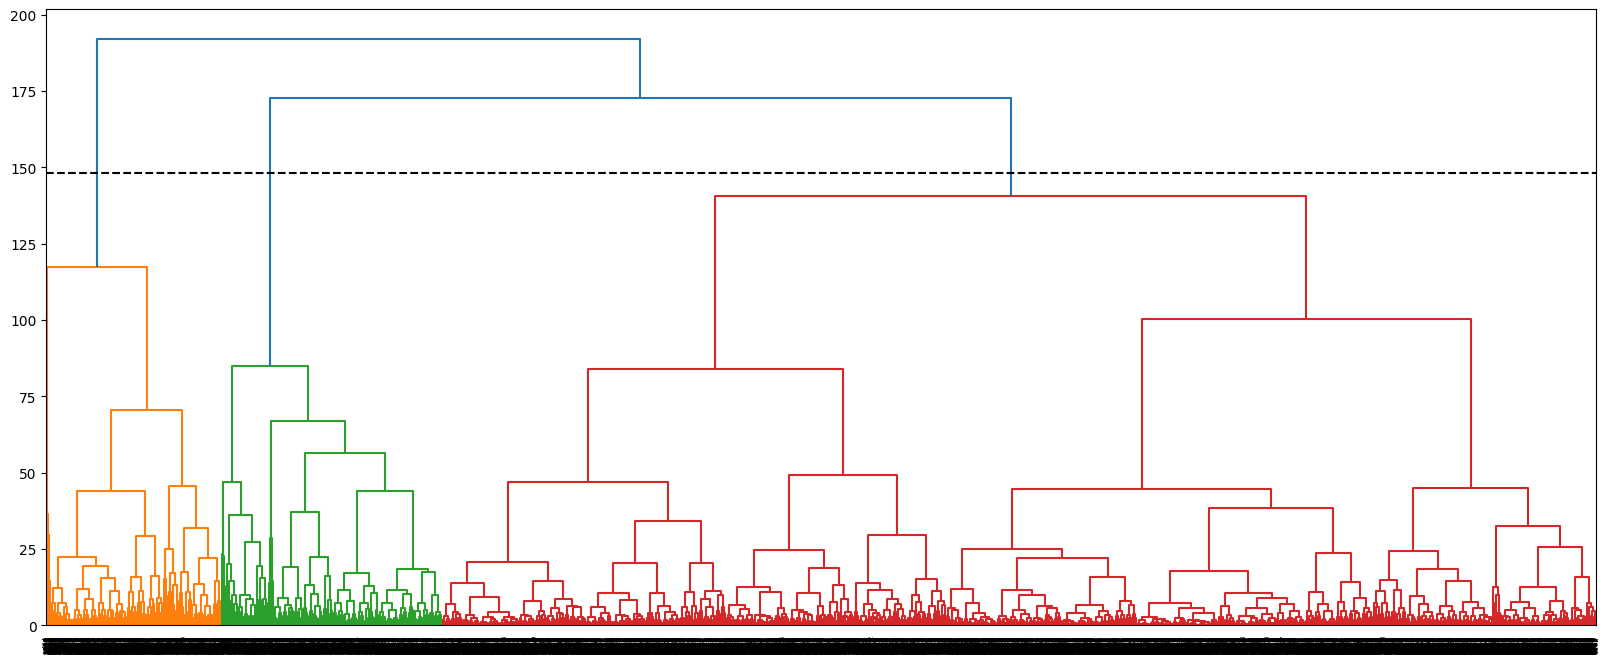

In [55]:
plt.figure(figsize=(20, 8))
dendrogram(Z1,color_threshold=dist_cluster)
plt.axhline(c='k',linestyle='--', y=dist_cluster)
plt.show()

In [59]:
cluster_labels = fcluster(Z1, t=dist_cluster, criterion='distance')

print(cluster_labels)

[3 2 3 ... 3 3 3]


In [60]:
sill_score5 = silhouette_score(xpca_reduced_2,cluster_labels)
print(sill_score5)

0.3992515798650787


The value c obtained from the cophenet function is the cophenetic correlation coefficient. This coefficient is a measure of how faithfully the hierarchical clustering (represented by the linkage matrix Z1) preserves the pairwise distances between the original data points

In [65]:
c, coph_dist = cophenet(Z1, pdist(xpca_reduced_2))
c

0.5147123670649733

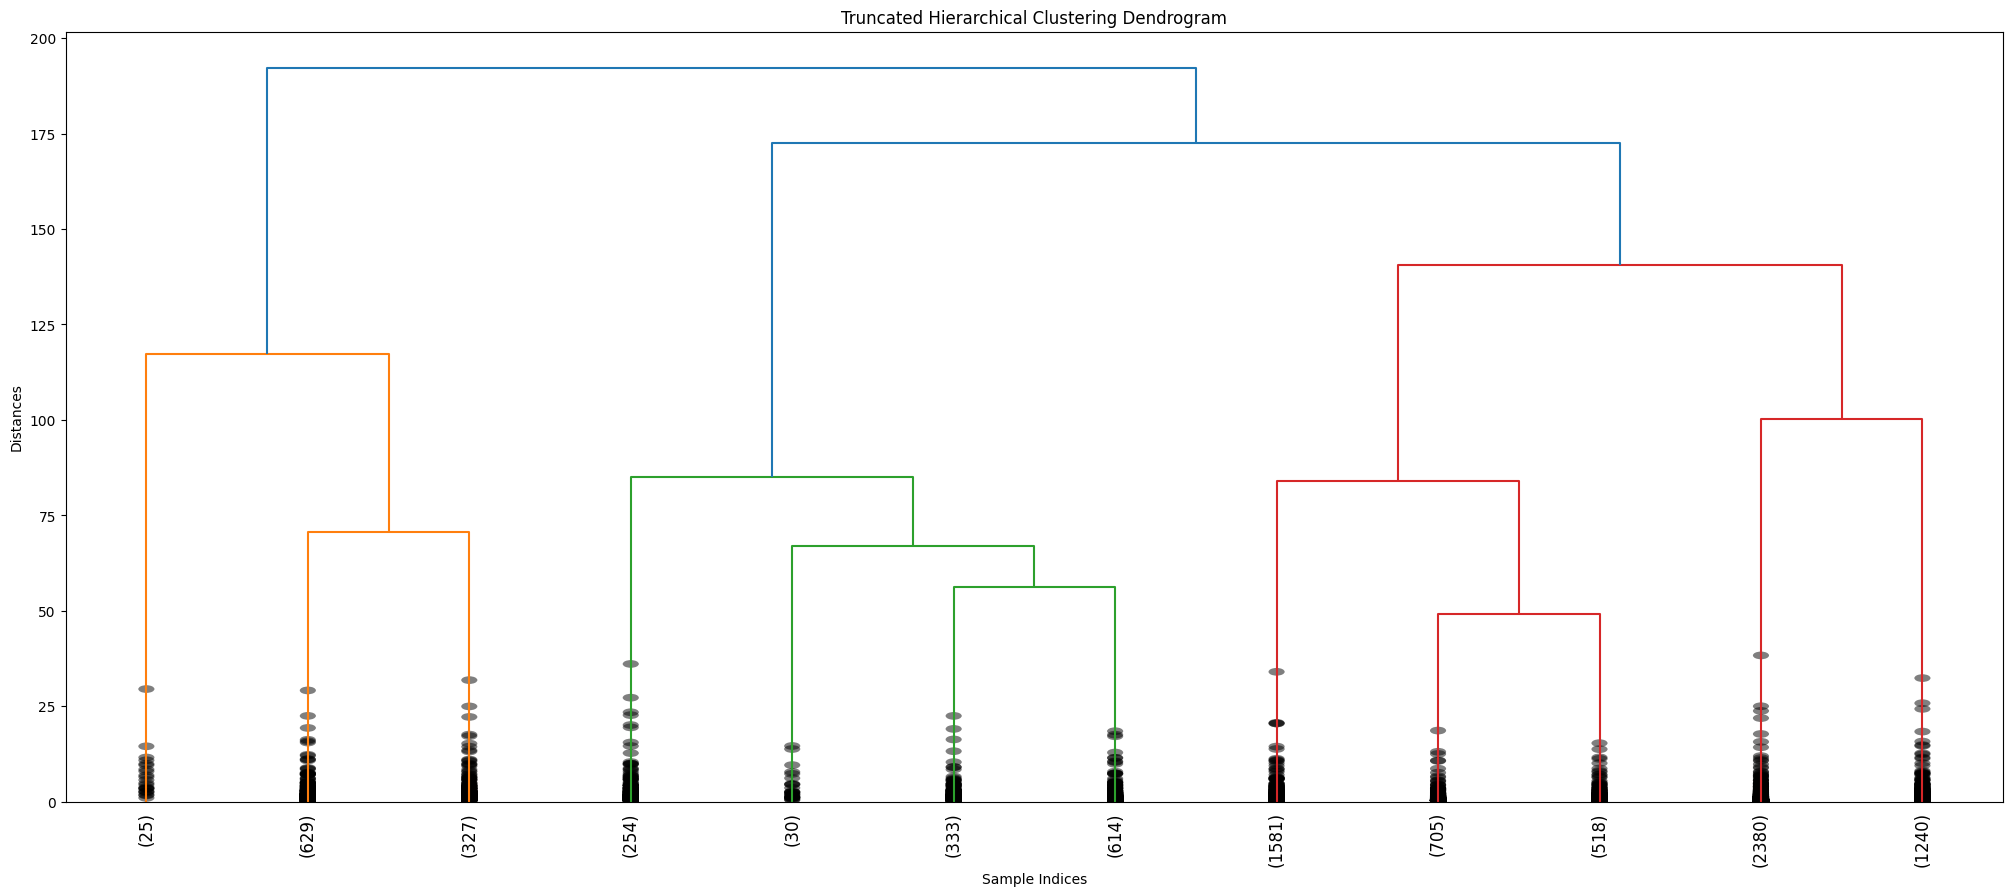

In [66]:
plt.figure(figsize=(25,10))
plt.title("Truncated Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Indices")
plt.ylabel("Distances")
dendrogram(Z1, leaf_rotation=90., leaf_font_size=12.0, color_threshold=0.75*200,
           truncate_mode="lastp", p=12, show_leaf_counts=True, show_contracted=True,)
plt.show()

In [67]:
def dendrogram_tune(*args, **kwargs):
    
    max_d = kwargs.pop("max_d", None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)
    
    ddata = dendrogram(*args, **kwargs)
        
    if not kwargs.get('no_plot', False):
        plt.title("Hierarchical Clustering with Truncated Dendrogram")
        plt.xlabel("Dataset Index (or Cluster Size)")
        plt.ylabel("Distance")
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate('%.3g' % y, (x, y), xytext=(0, -5),
                             textcoords="offset points", va="top", ha="center")
                
    if max_d:
        plt.axhline(y=max_d, c='k')
        
    return ddata


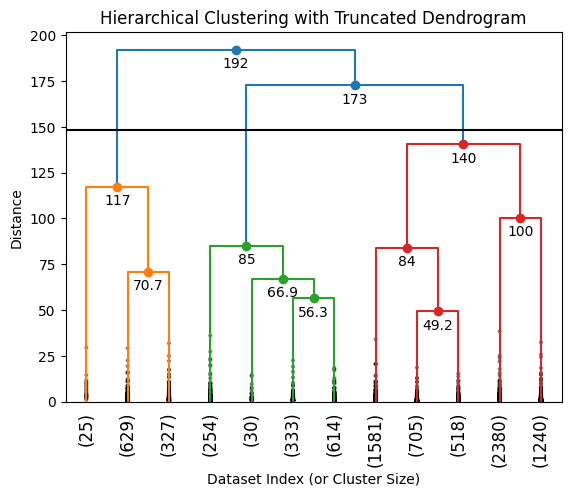

In [68]:
dendrogram_tune(Z1,truncate_mode='lastp',p=12, leaf_rotation=90., leaf_font_size=12.,
                show_contracted=True,annotate_above=10, max_d=148)
plt.show()

In [69]:
new_row = pd.DataFrame([{'Cluster': 'Agglomerative Clustering (2 PCA)', 'Sill': sill_score5}])
results_df = pd.concat([results_df, new_row], ignore_index=True)
results_df.head()

Cluster      Sill
0  K- Means (with scaled dataset, using all the v...  0.179912
1  K- Means (with scaled dataset, eliminating fir...  0.279135
2             K- Means (with scaled dataset and PCA)  0.181773
3                 K- Means (Only with the top 2 PCA)  0.448162
4                   Agglomerative Clustering (2 PCA)  0.399252

## 9 - Selection of the Best Model

In [70]:
results_df.head()

Cluster      Sill
0  K- Means (with scaled dataset, using all the v...  0.179912
1  K- Means (with scaled dataset, eliminating fir...  0.279135
2             K- Means (with scaled dataset and PCA)  0.181773
3                 K- Means (Only with the top 2 PCA)  0.448162
4                   Agglomerative Clustering (2 PCA)  0.399252

Since Model 3, which uses K-Means with three clusters and the top two principal components, has the highest silhouette score, I will create a graph to illustrate its clustering results.

C:\Users\manue\AppData\Local\Temp\ipykernel_7448\2962838854.py:14: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



* For k =  2  the average silhouette score is:  0.4603931873256771
   - For i =  1  the silhouette score for the cluster is:  0.27783201952677217
   - For i =  2  the silhouette score for the cluster is:  0.49929546173935013


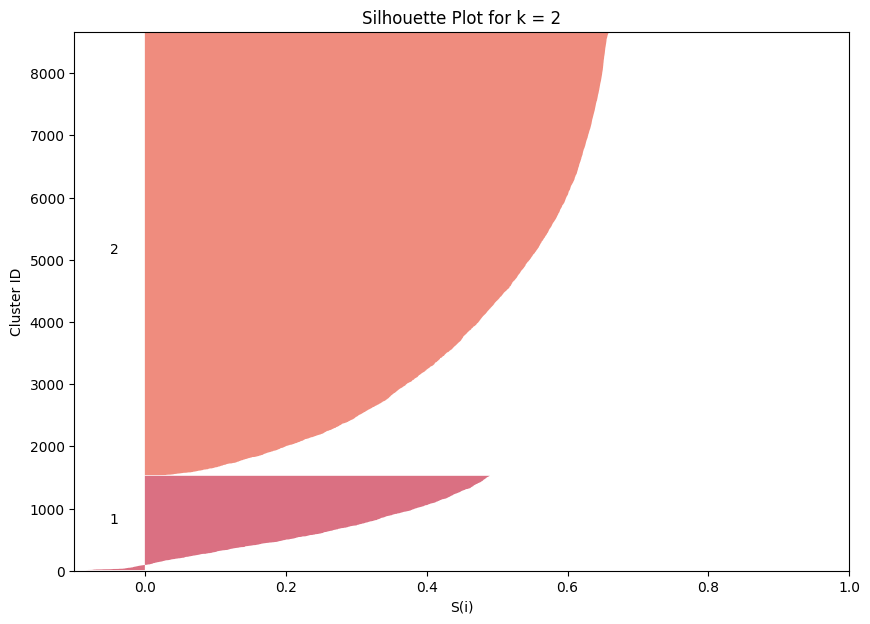

* For k =  3  the average silhouette score is:  0.44797905532383214
   - For i =  1  the silhouette score for the cluster is:  0.5037126239779525
   - For i =  2  the silhouette score for the cluster is:  0.36027932775983307
   - For i =  3  the silhouette score for the cluster is:  0.29179582084314987


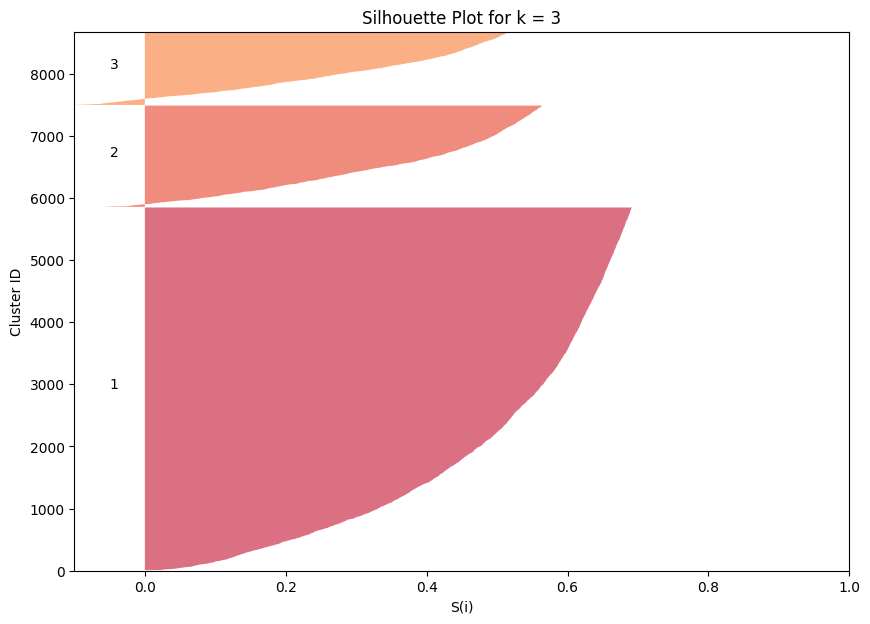

* For k =  4  the average silhouette score is:  0.4057208976704256
   - For i =  1  the silhouette score for the cluster is:  0.3993415313032254
   - For i =  2  the silhouette score for the cluster is:  0.24209531103243517
   - For i =  3  the silhouette score for the cluster is:  0.31486925588522785
   - For i =  4  the silhouette score for the cluster is:  0.46234565600738986


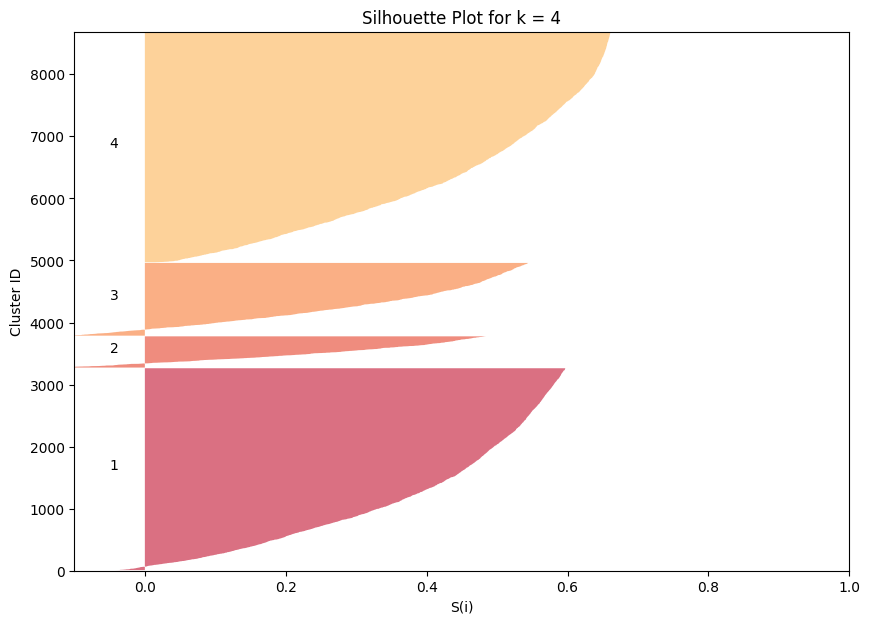

* For k =  5  the average silhouette score is:  0.3983142861671954
   - For i =  1  the silhouette score for the cluster is:  0.3177458011579404
   - For i =  2  the silhouette score for the cluster is:  0.4228502480201984
   - For i =  3  the silhouette score for the cluster is:  0.4374266280486493
   - For i =  4  the silhouette score for the cluster is:  0.21055311443961508
   - For i =  5  the silhouette score for the cluster is:  0.3083856134810976


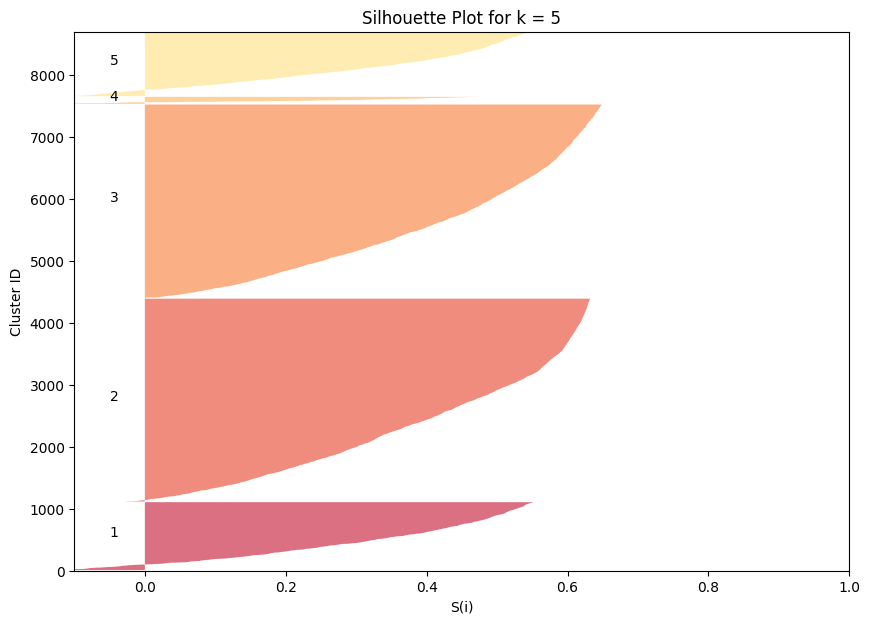

* For k =  6  the average silhouette score is:  0.3816655786985328
   - For i =  1  the silhouette score for the cluster is:  0.44003813309925827
   - For i =  2  the silhouette score for the cluster is:  0.40491175417325076
   - For i =  3  the silhouette score for the cluster is:  0.33138071902911775
   - For i =  4  the silhouette score for the cluster is:  0.26939516060390645
   - For i =  5  the silhouette score for the cluster is:  0.2917187421983348
   - For i =  6  the silhouette score for the cluster is:  0.26000603657830745


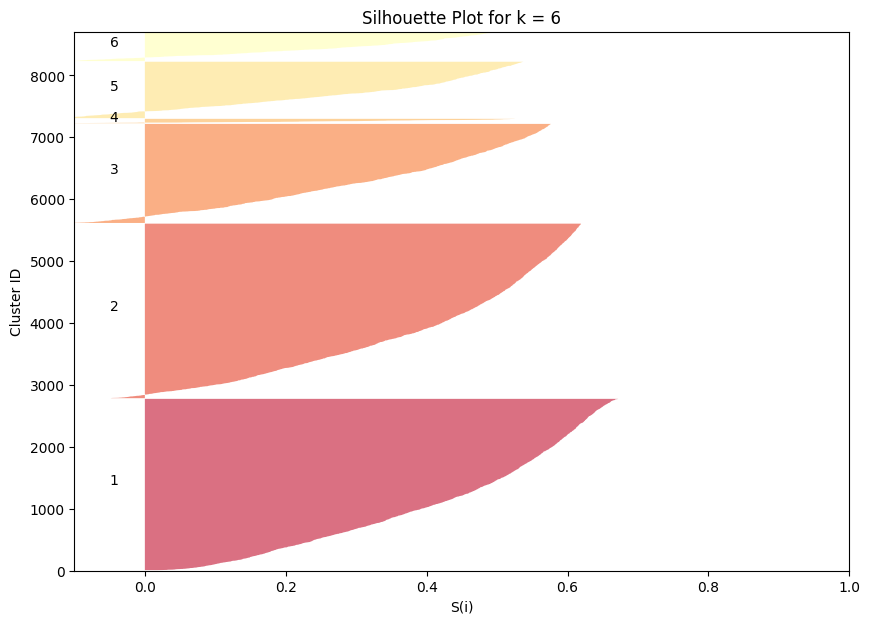

* For k =  7  the average silhouette score is:  0.3772012027029905
   - For i =  1  the silhouette score for the cluster is:  0.4108096461892369
   - For i =  2  the silhouette score for the cluster is:  0.25721496438756625
   - For i =  3  the silhouette score for the cluster is:  0.3304374649737726
   - For i =  4  the silhouette score for the cluster is:  0.30353737759779115
   - For i =  5  the silhouette score for the cluster is:  0.28872533298551084
   - For i =  6  the silhouette score for the cluster is:  0.3955055497319712
   - For i =  7  the silhouette score for the cluster is:  0.4308966249532635


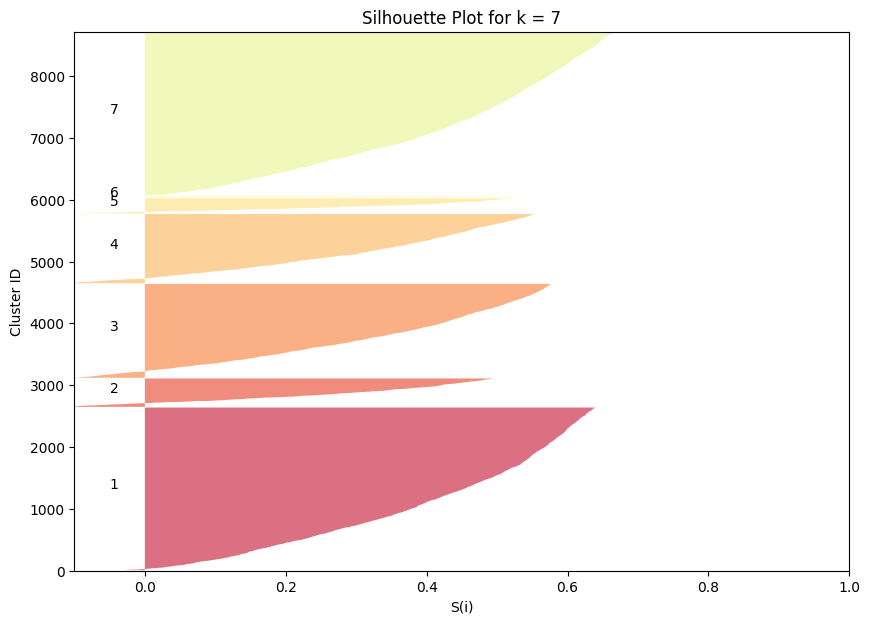

* For k =  8  the average silhouette score is:  0.35195565528477496
   - For i =  1  the silhouette score for the cluster is:  0.39122079589589104
   - For i =  2  the silhouette score for the cluster is:  0.1984027881632214
   - For i =  3  the silhouette score for the cluster is:  0.2939237228525651
   - For i =  4  the silhouette score for the cluster is:  0.4095758525132116
   - For i =  5  the silhouette score for the cluster is:  0.2898557603743656
   - For i =  6  the silhouette score for the cluster is:  0.39228605750627527
   - For i =  7  the silhouette score for the cluster is:  0.2660074806778995
   - For i =  8  the silhouette score for the cluster is:  0.34952885718850435


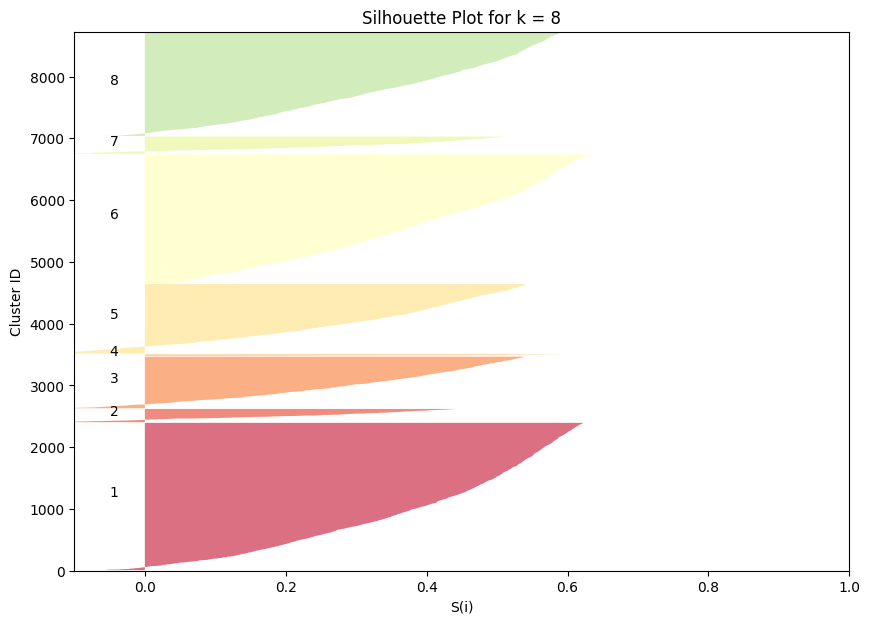

* For k =  9  the average silhouette score is:  0.36846725833765703
   - For i =  1  the silhouette score for the cluster is:  0.3866217122702935
   - For i =  2  the silhouette score for the cluster is:  0.37362943411000965
   - For i =  3  the silhouette score for the cluster is:  0.3984192656850666
   - For i =  4  the silhouette score for the cluster is:  0.2583905693671843
   - For i =  5  the silhouette score for the cluster is:  0.3852581045900891
   - For i =  6  the silhouette score for the cluster is:  0.42536467424732016
   - For i =  7  the silhouette score for the cluster is:  0.2703571175982127
   - For i =  8  the silhouette score for the cluster is:  0.20068647276040769
   - For i =  9  the silhouette score for the cluster is:  0.34031152684271476


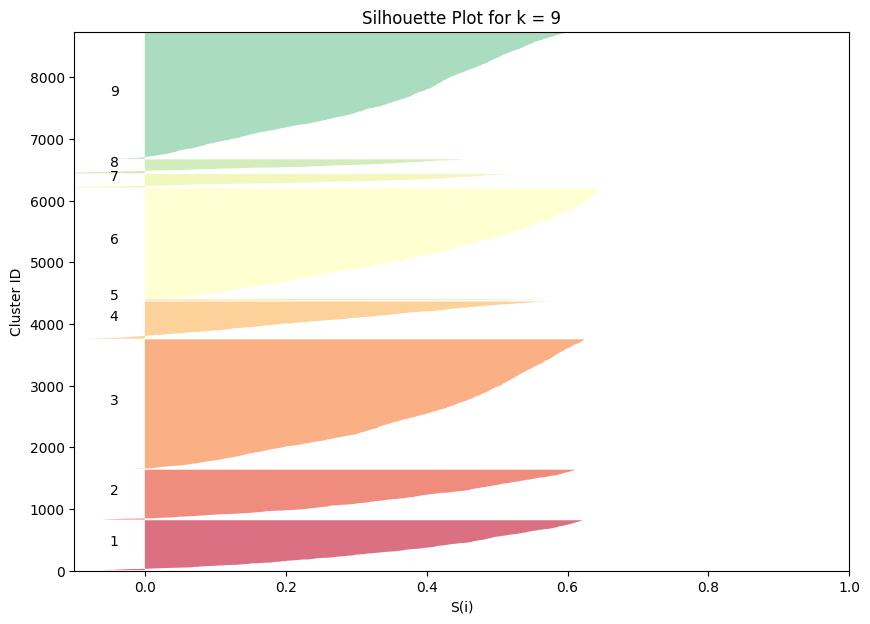

* For k =  10  the average silhouette score is:  0.366724297416067
   - For i =  1  the silhouette score for the cluster is:  0.28972688672032854
   - For i =  2  the silhouette score for the cluster is:  0.37914760922907204
   - For i =  3  the silhouette score for the cluster is:  0.3605227589137652
   - For i =  4  the silhouette score for the cluster is:  0.41065512248240604
   - For i =  5  the silhouette score for the cluster is:  0.36332412804793485
   - For i =  6  the silhouette score for the cluster is:  0.2544788603192428
   - For i =  7  the silhouette score for the cluster is:  0.3097042678726315
   - For i =  8  the silhouette score for the cluster is:  0.3728840296472811
   - For i =  9  the silhouette score for the cluster is:  0.39099953947624877
   - For i =  10  the silhouette score for the cluster is:  0.16177253564554417


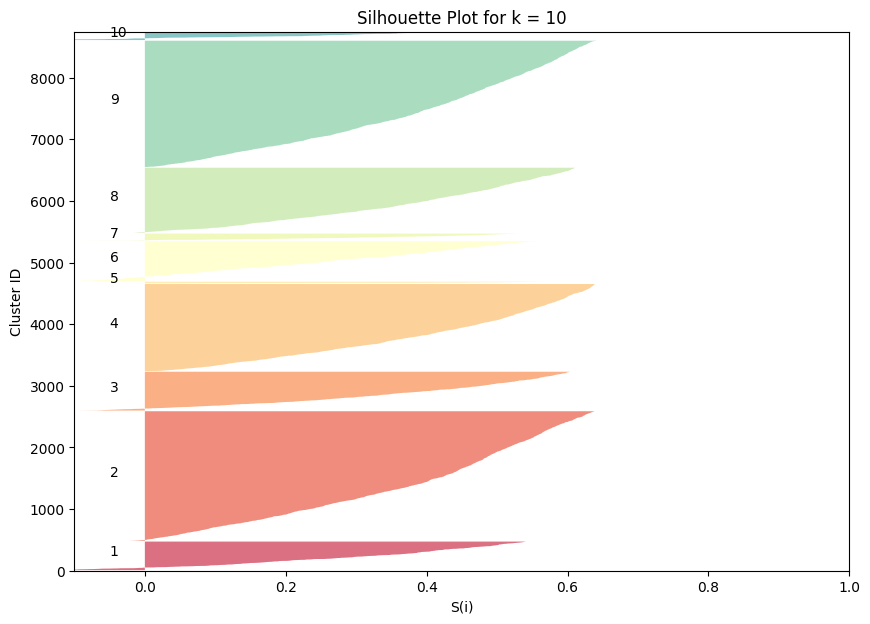

* For k =  11  the average silhouette score is:  0.37448689607183844
   - For i =  1  the silhouette score for the cluster is:  0.36426957989515407
   - For i =  2  the silhouette score for the cluster is:  0.3851377658524599
   - For i =  3  the silhouette score for the cluster is:  0.3503120669294594
   - For i =  4  the silhouette score for the cluster is:  0.3557363335717416
   - For i =  5  the silhouette score for the cluster is:  0.2204561612080365
   - For i =  6  the silhouette score for the cluster is:  0.4278037522834268
   - For i =  7  the silhouette score for the cluster is:  0.28448585580408664
   - For i =  8  the silhouette score for the cluster is:  0.3010180958084296
   - For i =  9  the silhouette score for the cluster is:  0.4138815800716611
   - For i =  10  the silhouette score for the cluster is:  0.24393904071268424
   - For i =  11  the silhouette score for the cluster is:  0.3661925454189581


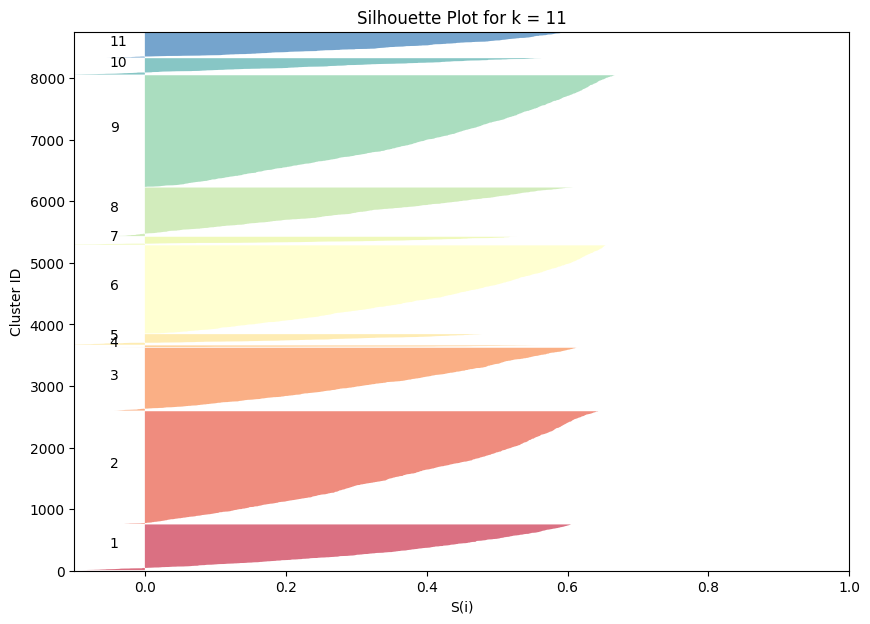

In [110]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.spatial.distance import cdist
import numpy as np
import pandas as pd
import matplotlib.cm as cm

# Assume xpca_reduced_2 is your data

max_k = 12  # Maximum number of clusters we will create
K = range(1, max_k)
ssw = []
cmap = cm.get_cmap("Spectral")
color_palette = [cmap(float(i) / max_k) for i in K]
centroid = [sum(xpca_reduced_2) / len(xpca_reduced_2) for i in K]
sst = sum(np.min(cdist(xpca_reduced_2, centroid, "euclidean"), axis=1))

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(xpca_reduced_2)
    
    centers = pd.DataFrame(kmeanModel.cluster_centers_)
    labels = kmeanModel.labels_
    
    ssw_k = sum(np.min(cdist(xpca_reduced_2, kmeanModel.cluster_centers_, "euclidean"), axis=1))
    ssw.append(ssw_k)
    
    label_color = [color_palette[i] for i in labels]
    
    # Create a silhouette plot for each cluster
    # To be safe, do not create a silhouette plot if k = 1 or k = len(X)
    if 1 < k < len(xpca_reduced_2):
        # Create a subplot with one row and one column for silhouette plot only
        fig, axis1 = plt.subplots(1, 1, figsize=(10, 7))
    
        # The first subplot will contain the silhouette plot
        axis1.set_xlim([-0.1, 1.0])
        axis1.set_ylim([0, len(xpca_reduced_2) + (k + 1) * 10])
    
        silhouette_avg = silhouette_score(xpca_reduced_2, labels)
        print("* For k = ", k, " the average silhouette score is: ", silhouette_avg)
        sample_silhouette_values = silhouette_samples(xpca_reduced_2, labels)
        
        y_lower = 10
        for i in range(k):
            # Add the silhouette for the i-th cluster
            ith_cluster_sv = sample_silhouette_values[labels == i]
            print("   - For i = ", i + 1, " the silhouette score for the cluster is: ", np.mean(ith_cluster_sv))
            # Sort the silhouette scores for the i-th cluster in descending order
            ith_cluster_sv.sort()
        
            # Calculate where to place the first silhouette on the vertical axis
            ith_cluster_size = ith_cluster_sv.shape[0]
            y_upper = y_lower + ith_cluster_size
            
            # Choose the color for the cluster
            color = color_palette[i]
            
            # Plot the silhouette for the i-th cluster
            axis1.fill_betweenx(np.arange(y_lower, y_upper),
                               0, ith_cluster_sv, facecolor=color, alpha=0.7)
            
            # Label the cluster with its number in the center
            axis1.text(-0.05, y_lower + 0.5 * ith_cluster_size, str(i + 1))
            
            # Calculate the new y_lower for the next cluster in the plot
            y_lower = y_upper + 10  # leave 10 positions empty
            
        axis1.set_title("Silhouette Plot for k = %s" % str(k))
        axis1.set_xlabel("S(i)")
        axis1.set_ylabel("Cluster ID")
        
        # Show the silhouette plot
        plt.show()
